<a href="https://colab.research.google.com/github/joshIsac/DeepLearningLab/blob/main/2348523_CIA2_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Momentum based algorithm for to find the optimal price
import numpy as np

# Define the revenue function f(w) and the shipping cost function g(w)
def revenue_cost(w):
    return -0.2 * w**2 + 50 * w - 200

def shipping_cost(w):
    return 0.1 * w**2 - 10 * w + 100

# Define the objective function h(w) as the difference between revenue and shipping cost
def objective_function(w):
    return revenue_cost(w) - shipping_cost(w)

# Define the gradient of the objective function
def gradient(w):
    return -0.4 * w + 50

# Momentum-based optimization algorithm
def momentum_optimization(w0, learning_rate, momentum_term, num_iterations):
    w = w0  # Initial price
    v = 0  # Initialize velocity
    for i in range(num_iterations):
        grad = gradient(w)
        v = momentum_term * v - learning_rate * grad  # Update velocity with momentum
        w += v  # Update price with velocity
    return w

# Parameters
initial_price =50 # Initial price
learning_rate = 0.01  # Learning rate
momentum = 0.9  # Momentum term
iterations = 5  # Number of iterations

# Find the optimal price
optimal_price = momentum_optimization(initial_price, learning_rate, momentum, iterations)

# Calculate revenue and shipping cost at the optimal price
optimal_revenue = revenue_cost(optimal_price)
optimal_shipping_cost = shipping_cost(optimal_price)

print("Optimal Price:", optimal_price)
print("Optimal Revenue:", optimal_revenue)
print("Optimal Shipping Cost:", optimal_shipping_cost)
print("Net Profit:", optimal_revenue - optimal_shipping_cost)

Optimal Price: 46.019439466803206
Optimal Revenue: 1677.4142115724073
Optimal Shipping Cost: -148.41551378415556
Net Profit: 1825.829725356563


In [ ]:
# @title 2) Question 2 implementation of ANN
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot


In [ ]:
iris_data=pd.read_csv("/content/drive/MyDrive/IRIS.csv")
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

here we see that there are no missing values hence not m uch preprocessing is reqd

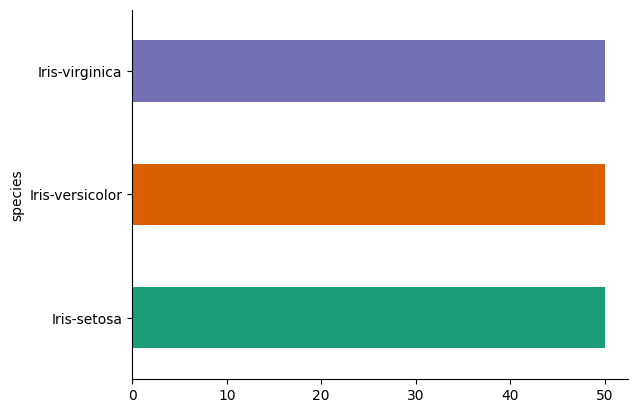

In [ ]:
# @title species

from matplotlib import pyplot as plt
import seaborn as sns
iris_data.groupby('species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

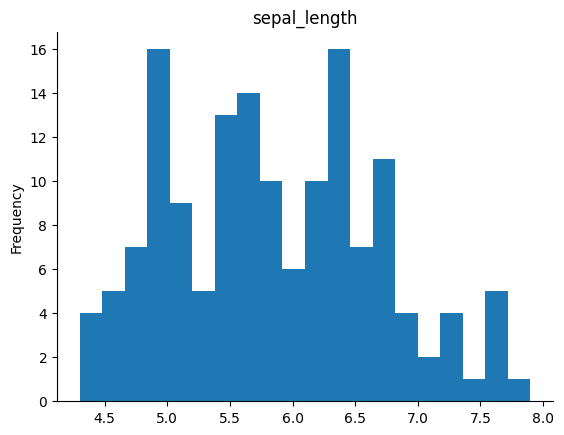

In [ ]:
# @title sepal_length

from matplotlib import pyplot as plt
iris_data['sepal_length'].plot(kind='hist', bins=20, title='sepal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

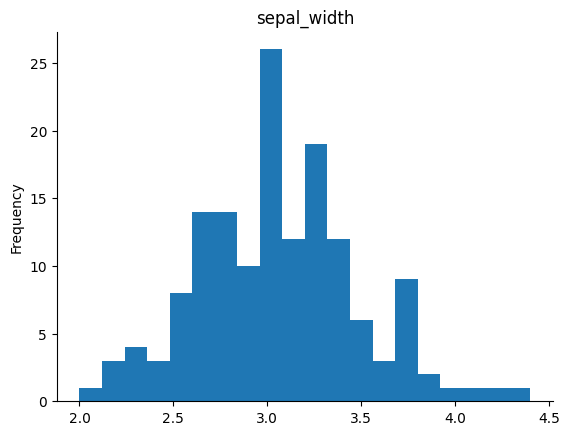

In [ ]:
# @title sepal_length

from matplotlib import pyplot as plt
iris_data['sepal_width'].plot(kind='hist', bins=20, title='sepal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model=scaler.fit(iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]=model.transform(iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

iris_data.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
142,0.416667,0.291667,0.694915,0.750000,Iris-virginica
39,0.222222,0.583333,0.084746,0.041667,Iris-setosa
129,0.805556,0.416667,0.813559,0.625000,Iris-virginica
124,0.666667,0.541667,0.796610,0.833333,Iris-virginica
85,0.472222,0.583333,0.593220,0.625000,Iris-versicolor


In [ ]:
#label encoding to convert iris species to labeling through 0,1,2
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
target= labelencoder.fit_transform(iris_data['species'])
target = pd.DataFrame(target)
target.rename(columns = {0:'species'}, inplace = True)
df = iris_data.drop(columns=['species'])
df = pd.concat([iris_data, target], axis=1)

df.sample(n=150)


,sepal_length,sepal_width,petal_length,petal_width,species,species
13,0.000000,0.416667,0.016949,0.000000,Iris-setosa,0
16,0.305556,0.791667,0.050847,0.125000,Iris-setosa,0
28,0.250000,0.583333,0.067797,0.041667,Iris-setosa,0
94,0.361111,0.291667,0.542373,0.500000,Iris-versicolor,1
72,0.555556,0.208333,0.661017,0.583333,Iris-versicolor,1
...,...,...,...,...,...,...
30,0.138889,0.458333,0.101695,0.041667,Iris-setosa,0
21,0.222222,0.708333,0.084746,0.125000,Iris-setosa,0
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa,0
18,0.388889,0.750000,0.118644,0.083333,Iris-setosa,0


In [ ]:
x = df.values[:,:4]

In [ ]:
y=iris_data["species"]

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

x_temp, X_test, y_temp, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state = 45)
X_train, X_val, y_train, y_val = train_test_split(x_temp, y_temp, stratify=y_temp, test_size=0.2, random_state = 45)


In [ ]:
# Encode the categorical target variable using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [ ]:
X_train = np.array(X_train, dtype='float32')
X_val = np.array(X_val, dtype='float32')
X_test = np.array(X_test, dtype='float32')
y_train = np.array(y_train, dtype='float32')
y_val = np.array(y_val, dtype='float32')
y_test = np.array(y_test, dtype='float32')

In [ ]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (96, 4)
X_val shape: (24, 4)
X_test shape: (30, 4)
y_train shape: (96,)
y_val shape: (24,)
y_test shape: (30,)


In [ ]:
X_test.shape

(30, 4)

In [ ]:
X_train.shape

(96, 4)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# Create a Sequential model
model = Sequential()

# Add input and hidden layers with L1 Regularization
model.add(Dense(64, kernel_regularizer=regularizers.l1(0.01), activation='relu'))
# Add another hidden layer with L2 Regularization
model.add(Dense(32, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
# Add a Dropout layer
model.add(Dropout(0.2))
# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:

history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/25
3/3 [==============================] - 1s 124ms/step - loss: 1.5177 - accuracy: 0.3542 - val_loss: 1.4783 - val_accuracy: 0.6250
Epoch 2/25
3/3 [==============================] - 0s 16ms/step - loss: 1.4552 - accuracy: 0.5312 - val_loss: 1.4221 - val_accuracy: 0.6667
Epoch 3/25
3/3 [==============================] - 0s 22ms/step - loss: 1.4180 - accuracy: 0.5729 - val_loss: 1.3704 - val_accuracy: 0.6667
Epoch 4/25
3/3 [==============================] - 0s 15ms/step - loss: 1.3603 - accuracy: 0.5938 - val_loss: 1.3199 - val_accuracy: 0.6667
Epoch 5/25
3/3 [==============================] - 0s 16ms/step - loss: 1.3073 - accuracy: 0.6250 - val_loss: 1.2693 - val_accuracy: 0.6667
Epoch 6/25
3/3 [==============================] - 0s 16ms/step - loss: 1.2667 - accuracy: 0.6042 - val_loss: 1.2186 - val_accuracy: 0.6667
Epoch 7/25
3/3 [==============================] - 0s 16ms/step - loss: 1.1944 - accuracy: 0.6250 - val_loss: 1.1684 - val_accuracy: 0.6250
Epoch 8/25
3/3 [==========

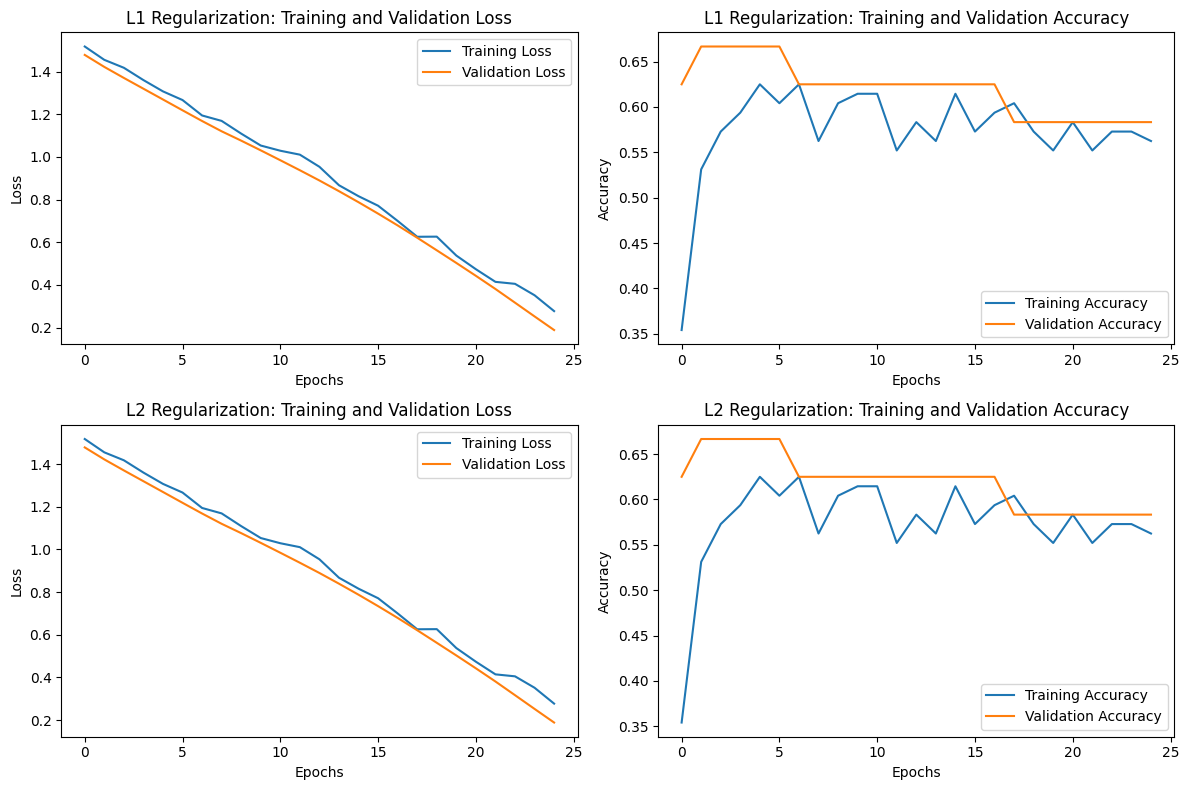

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

# Loss curves for L1 Regularization
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('L1 Regularization: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy curves for L1 Regularization
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('L1 Regularization: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss curves for L2 Regularization
plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('L2 Regularization: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy curves for L2 Regularization
plt.subplot(2, 2, 4)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('L2 Regularization: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


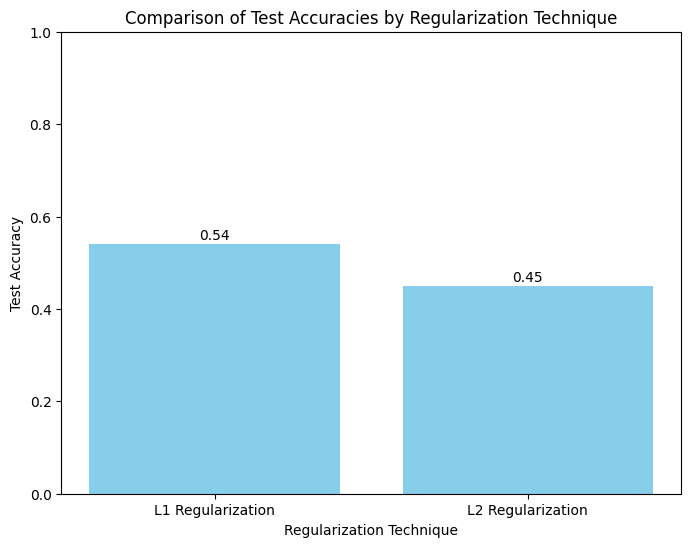

In [ ]:
import matplotlib.pyplot as plt

# Sample test accuracies (replace these with the actual test accuracies)
test_accuracy_l1 = 0.54
test_accuracy_l2 = 0.45

# Regularization techniques and corresponding test accuracies
test_accuracies = [test_accuracy_l1, test_accuracy_l2]
regularization_techniques = ['L1 Regularization', 'L2 Regularization']

plt.figure(figsize=(8, 6))
plt.bar(regularization_techniques, test_accuracies, color='skyblue')
plt.title('Comparison of Test Accuracies by Regularization Technique')
plt.xlabel('Regularization Technique')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for accuracy
for i, accuracy in enumerate(test_accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center')
plt.show()


here we see that overall accuracy achieved even after implementin regularisation is 55% when l1 regularisation and 45% for l2 regualrisation
results signify the need to further analyze the models